<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/StrokePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lets practice loading and exploring some data!

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('https://github.com/mbrudd/csci290/raw/main/data/stroke.csv')

In [85]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [87]:
df["stroke"].mean()

0.0487279843444227

In [88]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [89]:
df["stroke"].value_counts(normalize = True)

,proportion
stroke,
0,0.951272
1,0.048728


In [90]:
df["stroke"].unique()

array([1, 0])

In [91]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='age', ylabel='stroke'>

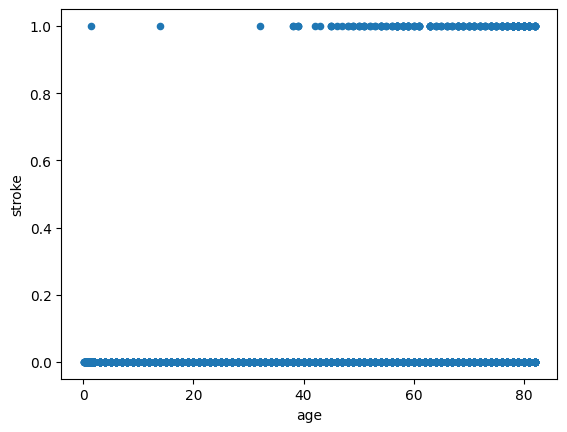

In [93]:
df.plot.scatter(x="age", y="stroke")

In [94]:
df["age"].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [95]:
df["age_cat"]=pd.cut(df["age"],bins = [0,25,45,61,100],labels = ["young","adult","middle_age","old"])

In [96]:
df["age_cat"].value_counts()

,count
age_cat,
adult,1325
young,1293
middle_age,1264
old,1228


In [97]:
df.groupby("heart_disease")["stroke"].mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


In [98]:
df.groupby(["heart_disease", "hypertension","ever_married"])["stroke"].mean()

heart_disease  hypertension  ever_married
0              0             No              0.008923
                             Yes             0.049283
               1             No              0.159091
                             Yes             0.117949
1              0             No              0.130435
                             Yes             0.164021
               1             No              0.444444
                             Yes             0.163636
Name: stroke, dtype: float64

In [99]:
df.groupby("age_cat")["stroke"].mean()

<ipython-input-99-ff85a4b5087e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_cat")["stroke"].mean()


,stroke
age_cat,
young,0.001547
adult,0.008302
middle_age,0.051424
old,0.139251


In [100]:
df["prediction"] = df["age"] > 80

In [101]:
df["prediction"].value_counts()

,count
prediction,
False,4994
True,116


In [102]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [103]:
cm = confusion_matrix(df["stroke"], df["prediction"])
cm

array([[4768,   93],
       [ 226,   23]])

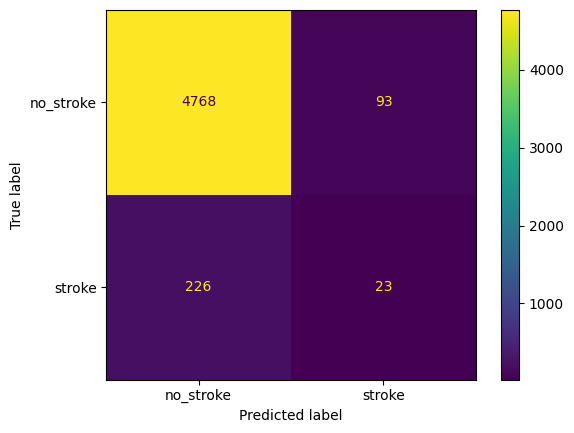

In [104]:
ConfusionMatrixDisplay(cm , display_labels = ["no_stroke","stroke"]).plot()

In [105]:
tn, fp, fn, tp =  confusion_matrix(df["stroke"], df["prediction"]).ravel()
tn, fp, fn, tp

(4768, 93, 226, 23)

In [106]:
import sklearn.metrics as metrics

In [107]:
metrics.recall_score(df["stroke"], df["prediction"])

0.09236947791164658

In [108]:
tp / (tp + fn)

0.09236947791164658

In [109]:
metrics.precision_score(df["stroke"], df["prediction"])

0.19827586206896552

In [110]:
tp / (tp + fp)

0.19827586206896552

In [111]:
def percision_vs_recall(threshold):
    df["prediction"] = df["age"] > threshold
        return metrics.precision_score(df["stroke"], df["prediction"]), metrics.recall_score(df["stroke"], df["prediction"])

IndentationError: unexpected indent (<ipython-input-111-3dee22296329>, line 3)

In [113]:
percision_vs_recall(61)

NameError: name 'percision_vs_recall' is not defined

In [112]:
percisions = []
recalls = []
thresholds = range(0,83)
for threshold in thresholds:
    percision, recall = percision_vs_recall(threshold)
    percisions.append(percision)
    recalls.append(recall)

NameError: name 'percision_vs_recall' is not defined